### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
#https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

In [2]:
tf.__version__

'2.8.0'

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.tail(25)  

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9975,9976,15666295,Smith,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9976,9977,15656062,Azikiwe,637,France,Female,33,7,103377.81,1,1,0,84419.78,0
9977,9978,15579969,Mancini,683,France,Female,32,9,0.00,2,1,1,24991.92,0
9978,9979,15703563,P'eng,774,France,Male,40,9,93017.47,2,1,0,191608.97,0
9979,9980,15692664,Diribe,677,France,Female,58,1,90022.85,1,0,1,2988.28,0
9980,9981,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9983,9984,15656710,Cocci,613,France,Male,40,4,0.00,1,0,0,151325.24,0
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0


In [4]:

X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [5]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [10]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, y_train, Y_val_and_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) 

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val= sc.transform(X_val)

### Adding the input layer and the first hidden layer

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential([
    Dense(6, activation='relu', input_shape=(12,)),  
    Dense(1, activation='sigmoid'),
])

In [15]:
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)


from keras.utils.vis_utils import plot_model    
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# I FIXED THIS PROBLEM USING GOOGLE COLAB, USE IT

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### Compiling the ANN

In [16]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, Y_val.shape, Y_test.shape)

(7000, 12) (1500, 12) (1500, 12) (7000,) (1500,) (1500,)


### Training the ANN on the Training set

In [18]:
myModel = model.fit(X_train, y_train, batch_size = 16, epochs = 100,validation_data=(X_val, Y_val))

Epoch 1/100
438/438 [==============================] - 3s 2ms/step - loss: 0.7190 - accuracy: 0.5644 - val_loss: 0.5430 - val_accuracy: 0.7473
Epoch 2/100
438/438 [==============================] - 1s 2ms/step - loss: 0.4951 - accuracy: 0.8037 - val_loss: 0.4633 - val_accuracy: 0.8093
Epoch 3/100
438/438 [==============================] - 1s 2ms/step - loss: 0.4478 - accuracy: 0.8220 - val_loss: 0.4216 - val_accuracy: 0.8253
Epoch 4/100
438/438 [==============================] - 1s 2ms/step - loss: 0.4199 - accuracy: 0.8311 - val_loss: 0.3935 - val_accuracy: 0.8467
Epoch 5/100
438/438 [==============================] - 1s 2ms/step - loss: 0.4004 - accuracy: 0.8373 - val_loss: 0.3736 - val_accuracy: 0.8593
Epoch 6/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3859 - accuracy: 0.8423 - val_loss: 0.3595 - val_accuracy: 0.8660
Epoch 7/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3751 - accuracy: 0.8424 - val_loss: 0.3487 - val_accuracy: 0.8680

Epoch 58/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3394 - accuracy: 0.8594 - val_loss: 0.3231 - val_accuracy: 0.8747
Epoch 59/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3393 - accuracy: 0.8597 - val_loss: 0.3249 - val_accuracy: 0.8720
Epoch 60/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3391 - accuracy: 0.8601 - val_loss: 0.3227 - val_accuracy: 0.8733
Epoch 61/100
438/438 [==============================] - 1s 1ms/step - loss: 0.3394 - accuracy: 0.8614 - val_loss: 0.3225 - val_accuracy: 0.8720
Epoch 62/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3390 - accuracy: 0.8583 - val_loss: 0.3231 - val_accuracy: 0.8753
Epoch 63/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8600 - val_loss: 0.3229 - val_accuracy: 0.8727
Epoch 64/100
438/438 [==============================] - 1s 2ms/step - loss: 0.3389 - accuracy: 0.8599 - val_loss: 0.3223 - val_accuracy:

### Predicting the result of a single observation



Use  ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say no to that customer ?

**Solution**

In [19]:
print(model.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


Therefore, our ANN/DNN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [20]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)
accuracy_score(Y_test, y_pred)

[[1167   47]
 [ 161  125]]


0.8613333333333333

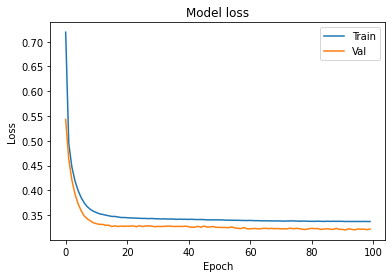

In [22]:
import matplotlib.pyplot as plt
plt.plot(myModel.history['loss'])
plt.plot(myModel.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

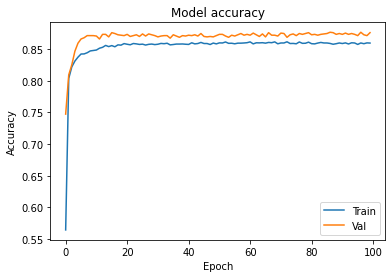

In [23]:
plt.plot(myModel.history['accuracy'])
plt.plot(myModel.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()